# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [16]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


Text(0, 0.5, 'Tip')

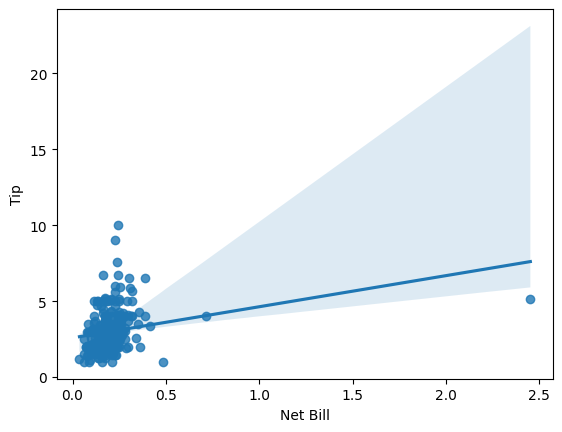

In [38]:
reg_1 = smf.ols('tip ~ tip_pct', data = tips).fit()
# Gráfico de dispersão com linha de regressão
sns.regplot(x='tip_pct', y='tip', data=tips)

# Configurações do gráfico
plt.xlabel('Net Bill')
plt.ylabel('Tip')

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

0.3325407312323707

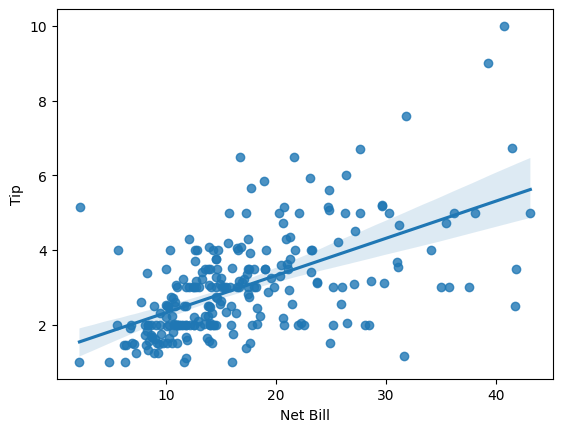

In [43]:
reg_2 = smf.ols('tip ~ net_bill', data = tips).fit()
# Gráfico de dispersão com linha de regressão
sns.regplot(x='net_bill', y='tip', data=tips)

# Configurações do gráfico
plt.xlabel('Net Bill')
plt.ylabel('Tip')
reg_2.rsquared

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

In [46]:
#Visualizando o gráfico temos uma dispersão maior com a variável net_bill e podemos perceber que o R-squared do segundo modelo é maior que o primeiro, significando que a variável net_bill tem um poder de previsão maior que o primeiro modelo.
print(reg_1.rsquared)
print(reg_2.rsquared)

0.058356920853244065
0.3325407312323707


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [57]:
pred = reg_1.fittedvalues
print(pred)
pred_1 = smf.ols('tip ~ tip_pct*net_bill', data = tips).fit()
print(pred_1.fittedvalues)
pred_1.rsquared

0      2.714081
1      2.976022
2      2.993701
3      2.917205
4      2.936793
         ...   
239    3.108838
240    2.747272
241    2.782726
242    2.807562
243    2.973710
Length: 244, dtype: float64
0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Length: 244, dtype: float64


1.0